# Brief Overview:
Entering high school students make *program choices* among **vocational program** and **academic program**. Their choice might be modeled using their *writing score* and their *social economic status*. Academic Programs are more likely to demand essays and logical reasoning, whereas vocational Programs are about practical hands-on training and learning tangible skills. The basic difference between these two is theory versus practice. An academic school generally teaches theoretical knowledge and broad-based research skills, while a vocational school teaches hands-on, applied skills such as carpentry, auto mechanics and hairdressing.

**University of Texas wants to launch some new programs and want to know their target audience (Which student should be pitched for what course/program). They hired you to do the analysis and predict which program a student will choose out of *Academic Programs* and *Vocational Programs* on the basis of the information given such as socio-economic status, the type of school attended (public or private), gender and their prior reading, writing, maths and science scores.**

In [3]:
import pandas as pd
import numpy as np
# for preprocessing the data
from sklearn import preprocessing
#To split the dataset into train/test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# to calculate the accuracy scores of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [6]:
df=pd.read_csv("Program_Choice.csv",index_col=0)

In [7]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,vocation,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1


In [8]:
df['honors'].replace({'enrolled':'1','not enrolled':'0'}, inplace=True)

In [9]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,0,0.0,1
1,108.0,male,middle,public,vocation,34.0,33.0,41.0,36.0,36.0,0,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,0,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,0,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,0,0.0,1


In [10]:
df['ses'].replace({'high':'3','middle':'2','low':'1'}, inplace=True)

In [11]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,1,public,vocation,34.0,35.0,41.0,29.0,26.0,0,0.0,1
1,108.0,male,2,public,vocation,34.0,33.0,41.0,36.0,36.0,0,0.0,1
2,15.0,male,3,public,vocation,39.0,39.0,44.0,26.0,42.0,0,0.0,1
3,67.0,male,1,public,vocation,37.0,37.0,42.0,33.0,32.0,0,0.0,1
4,153.0,male,2,public,vocation,39.0,31.0,40.0,39.0,51.0,0,0.0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    float64
 1   female   200 non-null    object 
 2   ses      200 non-null    object 
 3   schtyp   200 non-null    object 
 4   prog     200 non-null    object 
 5   read     200 non-null    float64
 6   write    200 non-null    float64
 7   math     200 non-null    float64
 8   science  200 non-null    float64
 9   socst    200 non-null    float64
 10  honors   200 non-null    object 
 11  awards   200 non-null    float64
 12  cid      200 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 21.9+ KB


In [14]:
df.shape

(200, 13)

In [15]:
df.drop("id",axis=1,inplace=True)

In [16]:
df.head()

,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,female,1,public,vocation,34.0,35.0,41.0,29.0,26.0,0,0.0,1
1,male,2,public,vocation,34.0,33.0,41.0,36.0,36.0,0,0.0,1
2,male,3,public,vocation,39.0,39.0,44.0,26.0,42.0,0,0.0,1
3,male,1,public,vocation,37.0,37.0,42.0,33.0,32.0,0,0.0,1
4,male,2,public,vocation,39.0,31.0,40.0,39.0,51.0,0,0.0,1


In [17]:
df.shape

(200, 12)

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype =="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards', 'cid']


In [20]:
df.rename(columns={'female':'gender'},inplace=True)

In [21]:
df.head()

,gender,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,female,1,public,vocation,34.0,35.0,41.0,29.0,26.0,0,0.0,1
1,male,2,public,vocation,34.0,33.0,41.0,36.0,36.0,0,0.0,1
2,male,3,public,vocation,39.0,39.0,44.0,26.0,42.0,0,0.0,1
3,male,1,public,vocation,37.0,37.0,42.0,33.0,32.0,0,0.0,1
4,male,2,public,vocation,39.0,31.0,40.0,39.0,51.0,0,0.0,1


In [22]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype =="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['gender', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards', 'cid']


In [24]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.0,71.0
awards,200.0,1.670,1.818691,0.0,0.00,1.0,2.0,7.0
cid,200.0,10.430,5.801152,1.0,5.00,10.5,15.0,20.0


In [25]:
df[cat].describe().T

,count,unique,top,freq
gender,200,2,female,109
ses,200,3,2,95
schtyp,200,2,public,168
prog,200,2,academic,105
honors,200,2,0,147


In [26]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,gender,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid


In [27]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ": ",df[column].nunique())
        print(df[column].value_counts().sort_values)
        print('\n')

GENDER :  2
<bound method Series.sort_values of female    109
male       91
Name: gender, dtype: int64>


SES :  3
<bound method Series.sort_values of 2    95
3    58
1    47
Name: ses, dtype: int64>


SCHTYP :  2
<bound method Series.sort_values of public     168
private     32
Name: schtyp, dtype: int64>


PROG :  2
<bound method Series.sort_values of academic    105
vocation     95
Name: prog, dtype: int64>


HONORS :  2
<bound method Series.sort_values of 0    147
1     53
Name: honors, dtype: int64>




Text(0.5, 1.0, 'Socst Boxplot')

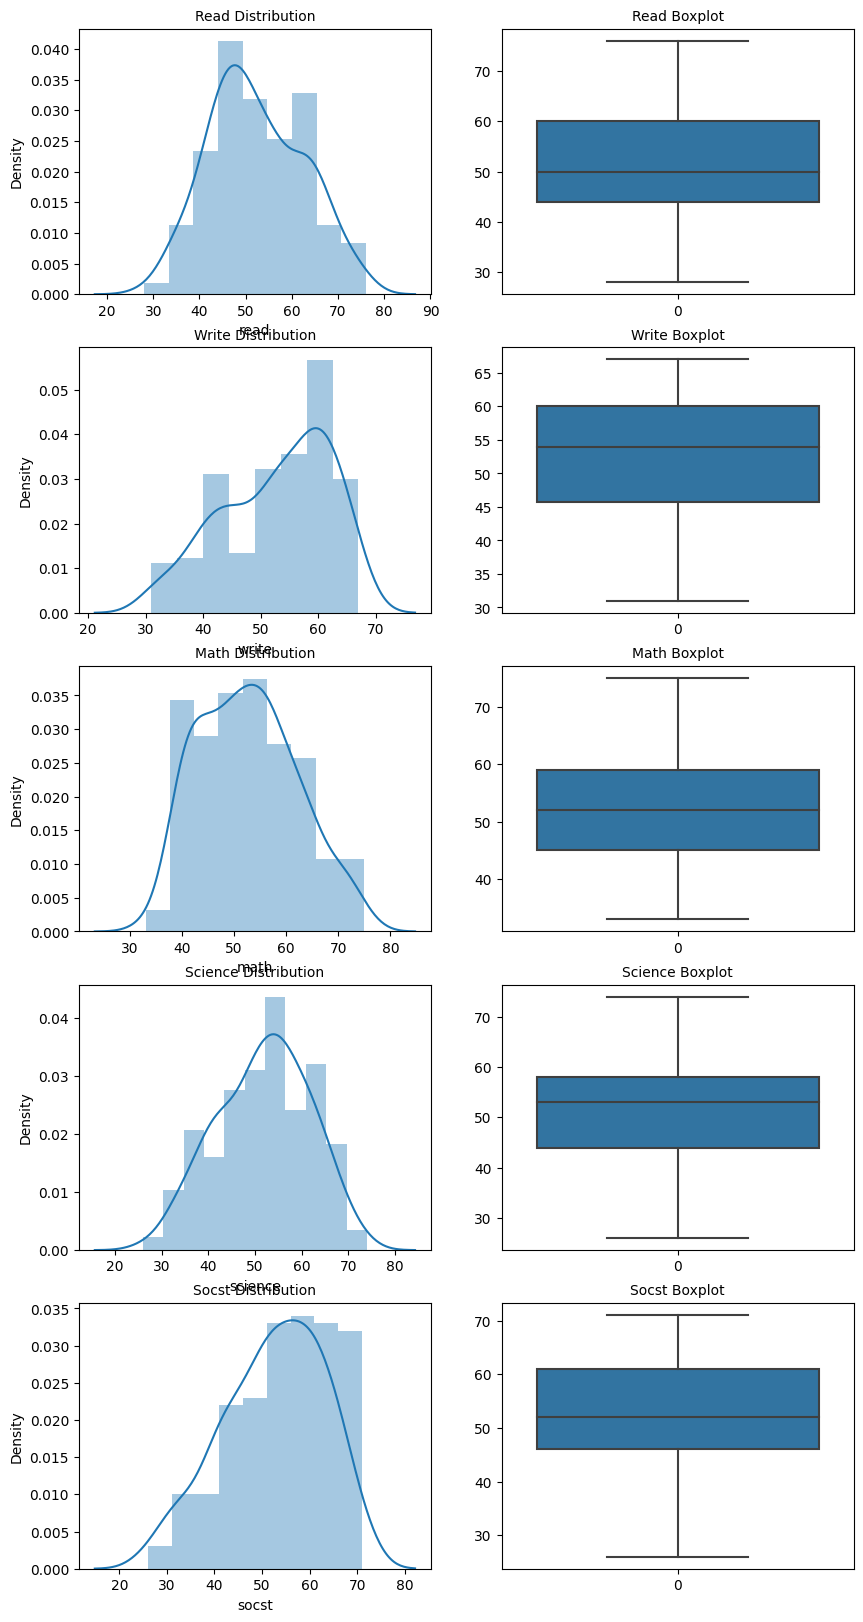

In [29]:
fig,axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,20)
a=sns.distplot(df['read'],ax=axes[0][0])
a.set_title("Read Distribution", fontsize=10)

a=sns.boxplot(df['read'],orient='v',ax=axes[0][1])
a.set_title("Read Boxplot", fontsize=10)

a=sns.distplot(df['write'],ax=axes[1][0])
a.set_title("Write Distribution", fontsize=10)

a=sns.boxplot(df['write'],orient='v',ax=axes[1][1])
a.set_title("Write Boxplot", fontsize=10)

a=sns.distplot(df['math'],ax=axes[2][0])
a.set_title("Math Distribution", fontsize=10)

a=sns.boxplot(df['math'],orient='v',ax=axes[2][1])
a.set_title("Math Boxplot", fontsize=10)

a=sns.distplot(df['science'],ax=axes[3][0])
a.set_title("Science Distribution", fontsize=10)

a=sns.boxplot(df['science'],orient='v',ax=axes[3][1])
a.set_title("Science Boxplot", fontsize=10)

a=sns.distplot(df['socst'],ax=axes[4][0])
a.set_title("Socst Distribution", fontsize=10)

a=sns.boxplot(df['socst'],orient='v',ax=axes[4][1])
a.set_title("Socst Boxplot", fontsize=10)

# Bivariate Analysis

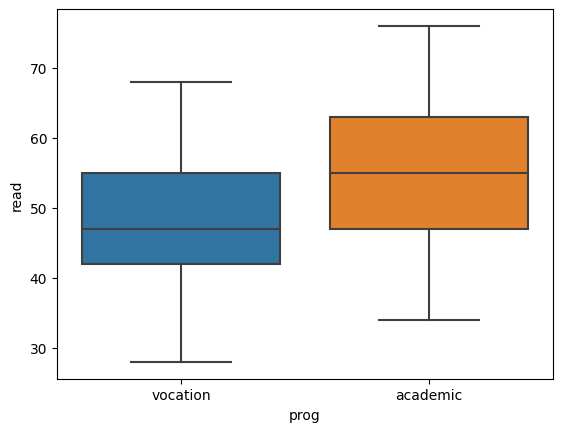

In [30]:
sns.boxplot(x="prog",y="read",data=df)
plt.show()

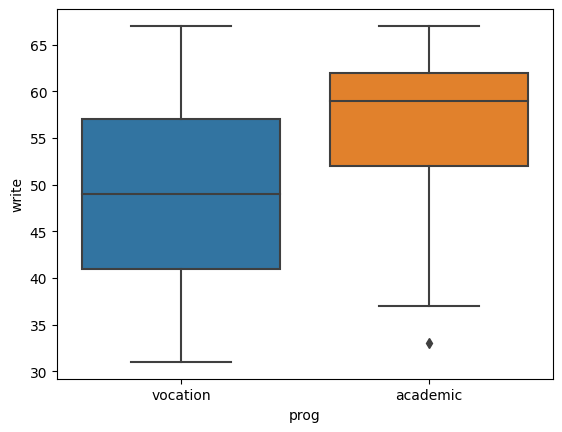

In [31]:
sns.boxplot(x="prog",y="write",data=df)
plt.show()

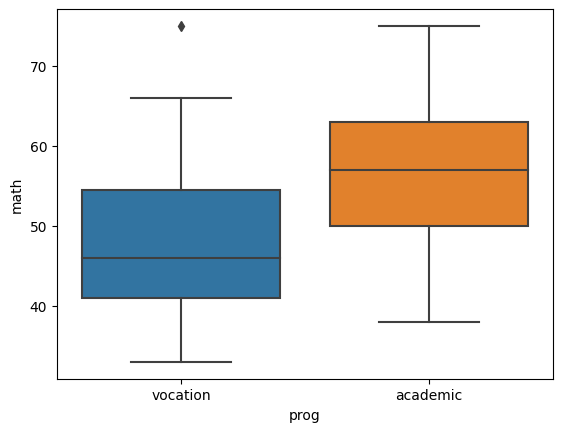

In [32]:
sns.boxplot(x="prog",y="math",data=df)
plt.show()

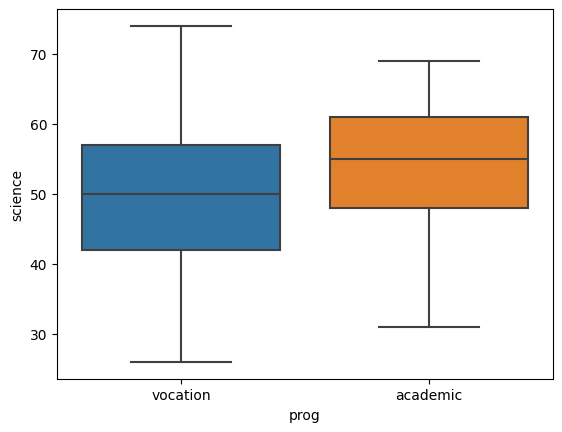

In [33]:
sns.boxplot(x="prog",y="science",data=df)
plt.show()

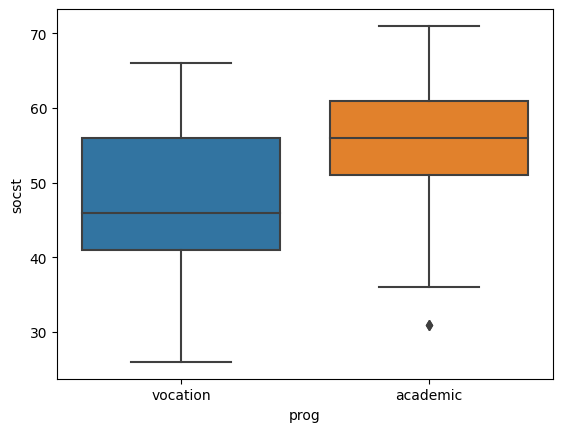

In [34]:
sns.boxplot(x="prog",y="socst",data=df)
plt.show()

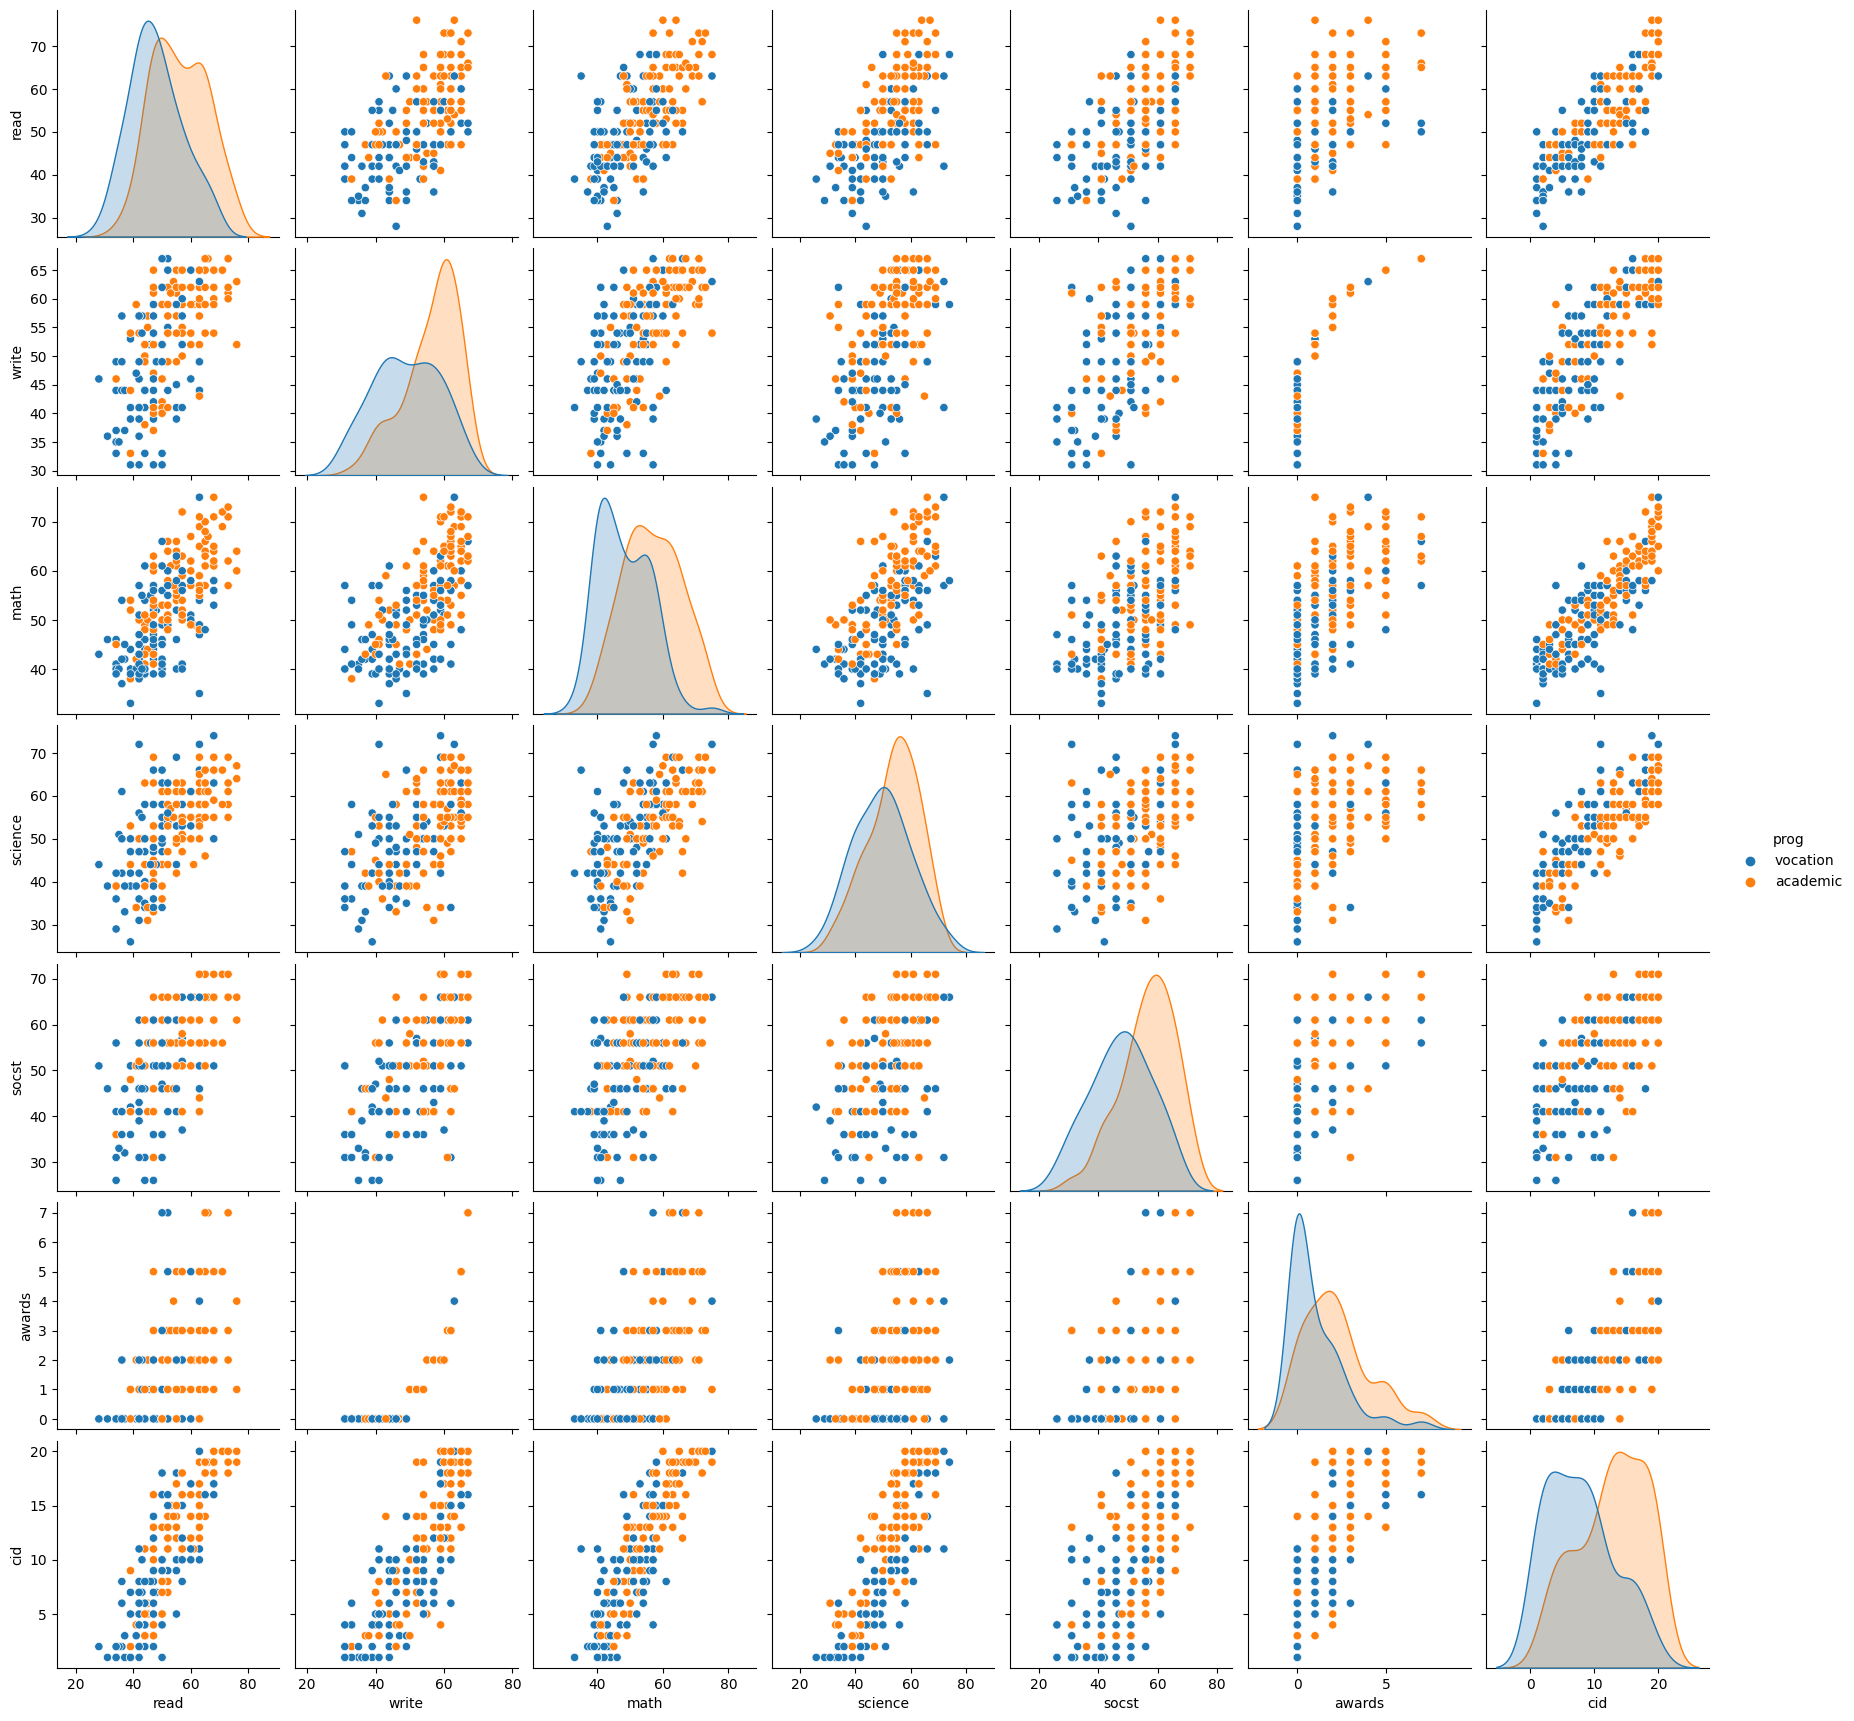

In [35]:
sns.pairplot(df,hue="prog")

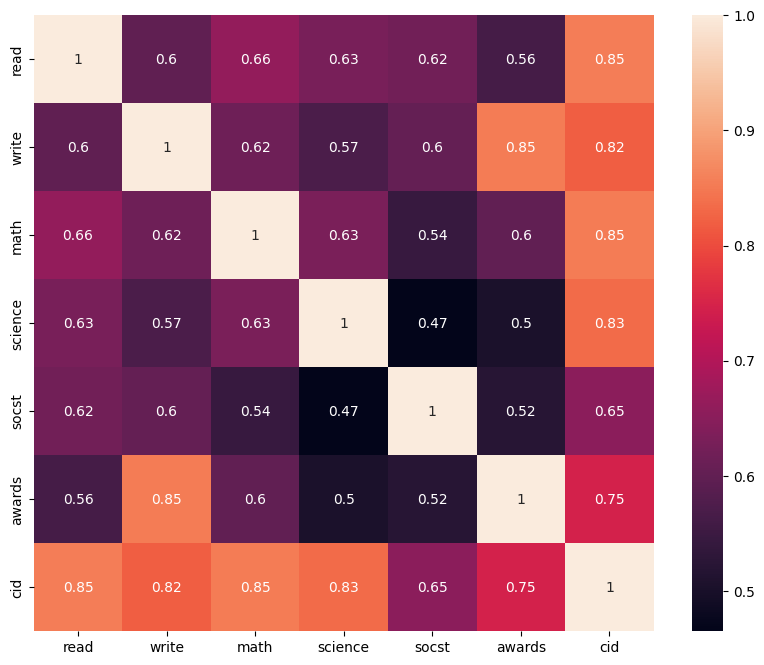

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

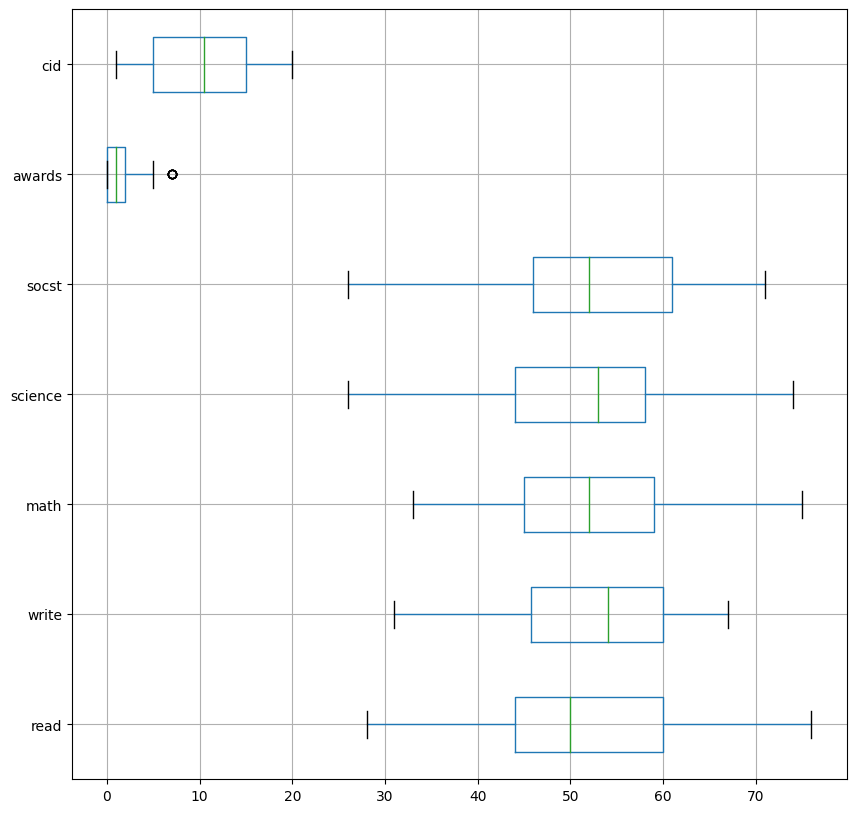

In [37]:
#construct boxplots for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [38]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [39]:
lr,ur=remove_outlier(df["awards"])
df["awards"]=np.where(df["awards"]>ur,ur,df["awards"])
df["awards"]=np.where(df["awards"]<lr,lr,df["awards"])

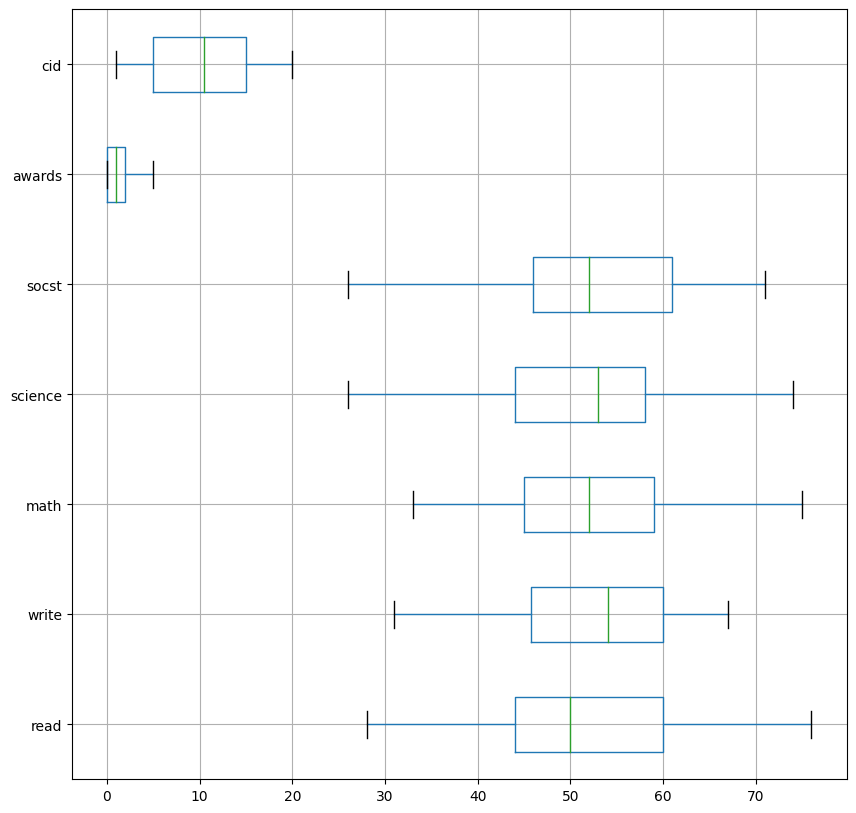

In [40]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [41]:
cat

['gender', 'ses', 'schtyp', 'prog', 'honors']

In [42]:
cat1 = ['gender', 'ses', 'schtyp', 'honors']

In [43]:
cat1

['gender', 'ses', 'schtyp', 'honors']

In [44]:
df=pd.get_dummies(df,columns=cat1,drop_first=True)

In [45]:
df.shape

(200, 13)

In [46]:
df.head()

,prog,read,write,math,science,socst,awards,cid,gender_male,ses_2,ses_3,schtyp_public,honors_1
0,vocation,34.0,35.0,41.0,29.0,26.0,0.0,1,0,0,0,1,0
1,vocation,34.0,33.0,41.0,36.0,36.0,0.0,1,1,1,0,1,0
2,vocation,39.0,39.0,44.0,26.0,42.0,0.0,1,1,0,1,1,0
3,vocation,37.0,37.0,42.0,33.0,32.0,0.0,1,1,0,0,1,0
4,vocation,39.0,31.0,40.0,39.0,51.0,0.0,1,1,1,0,1,0


# Train-Test split - X and y into training and test set into 70:30 ratio with random_state=1

In [47]:
X = df.drop("prog",axis=1) #independent variables
y = df["prog"] # dependent variable or target variable

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

# Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [50]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

Performance Matric on train data set

In [52]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)   #Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))   #confusion matrix
print(metrics.classification_report(y_train,y_train_predict))

0.7071428571428572
[[50 20]
 [21 49]]
              precision    recall  f1-score   support

    academic       0.70      0.71      0.71        70
    vocation       0.71      0.70      0.71        70

    accuracy                           0.71       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.71      0.71      0.71       140



In [53]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)   #Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))   #confusion matrix
print(metrics.classification_report(y_test,y_test_predict))

0.75
[[25 10]
 [ 5 20]]
              precision    recall  f1-score   support

    academic       0.83      0.71      0.77        35
    vocation       0.67      0.80      0.73        25

    accuracy                           0.75        60
   macro avg       0.75      0.76      0.75        60
weighted avg       0.76      0.75      0.75        60

